In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import fbeta_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Importação e Leitura dos Dados

In [2]:
# Importação e Leitura dos dados
df_train = pd.read_csv('classification_train.csv')
df_test = pd.read_csv('classification_test.csv')

# 2. Análise das Features

In [3]:
# Análise da base a partir dos 5 primeiros registros
df_train.head()

,x1,x2,target
0,1.934224,-0.111822,1
1,1.767383,-0.976402,1
2,0.937101,-0.085633,1
3,1.340732,0.166960,1
4,-0.199901,-0.155204,1


In [4]:
# Análise dos Valores das Features da base de treino
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 3 columns):
x1        670 non-null float64
x2        670 non-null float64
target    670 non-null int64
dtypes: float64(2), int64(1)
memory usage: 15.8 KB


In [5]:
# Análise dos Valores das Features da base de testes
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 3 columns):
x1        330 non-null float64
x2        330 non-null float64
target    330 non-null int64
dtypes: float64(2), int64(1)
memory usage: 7.9 KB


In [6]:
# Análise dos Valores das Features da base de treino
df_train.describe()

,x1,x2,target
count,670.000000,670.000000,670.000000
mean,0.481824,0.262611,0.505970
std,0.914772,0.615023,0.500338
min,-1.939767,-1.313970,0.000000
25%,-0.169615,-0.159189,0.000000
50%,0.492489,0.275538,1.000000
75%,1.159680,0.717589,1.000000
max,2.590410,1.904169,1.000000


In [7]:
# Análise dos Valores das Features da base de teste
df_test.describe()

,x1,x2,target
count,330.000000,330.000000,330.000000
mean,0.472470,0.266104,0.487879
std,0.986760,0.583819,0.500612
min,-1.693028,-1.031435,0.000000
25%,-0.264152,-0.190844,0.000000
50%,0.503077,0.240346,0.000000
75%,1.218472,0.680558,1.000000
max,2.528373,1.783693,1.000000


In [8]:
# divisão da Variáveis Independentes e Dependentes
X_train = df_train[['x1','x2']]
y_train = df_train['target']
X_test = df_test[['x1','x2']]
y_test = df_test['target']

# 3. Classificação

Para este problema, foi utilizado o Algoritmo Random Forest da library scikit-learn. Neste problema utilizamos o método "validation_curve" para definir o parâmetro de máxima profundidade das Árvores, buscando obter os melhores resultados e evitar um overfitting. A partir validation Curve será plotado um gráfico para mostrar o quão bem um modelo executa com diferentes valores de um único "max_dapth".

In [9]:
# Definindo um intervalo entre 1 e 20
degrees = np.arange(1, 21)
# Utilizando o "validation_curve" para encontar o melhor hiperparâmetro "max_depth" entre 1 e 20
train_scoreNum, validation_scores = validation_curve( 
                                RandomForestClassifier(), 
                                X = X_train, y = y_train, 
                                param_name = 'max_depth', 
                                param_range =degrees,  cv = 3)

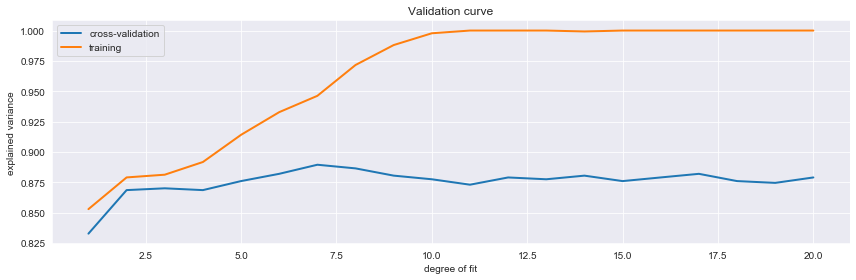

In [10]:
# Plot validation_curve
plt.figure(figsize=(12, 4))
sns.set_style('darkgrid')
plt.plot(degrees, validation_scores.mean(axis=1), lw=2,
         label='cross-validation')
plt.plot(degrees, train_scoreNum.mean(axis=1), lw=2, label='training')

plt.legend(loc='best')
plt.xlabel('degree of fit')
plt.ylabel('explained variance')
plt.title('Validation curve')
plt.tight_layout()

Para este caso, o gráfico acima mostra que a melhor medida encontrada para o hiperparâmetro "max_depth" é 7. Percebe-se que este valor é o que apresenta melhor acurácia ao observar o eixo y.

## 3.1 Treinamento

Após a obtenção do valor de "max_depth", o treinamento será relizado.

In [11]:
# Treinamento da Classificação utlizando Random Forest, com max_depth=7
reg_rf = RandomForestClassifier(max_depth=7) 
reg_rf.fit (X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## 3.2 Classificação

Após o treinamento, pode-se realizar a classificação na base de teste.

In [12]:
y_pred = reg_rf.predict (X_test)

# 4. Avaliação do Modelo

In [13]:
# 'precision','recall','f2-score','support'
pd.DataFrame(precision_recall_fscore_support(y_test, y_pred, beta=2.0),columns=['x1', 'x2'], index = ['precision','recall','f2-score','support'])

,x1,x2
precision,0.890909,0.866667
recall,0.869822,0.888199
f2-score,0.873960,0.883807
support,169.000000,161.000000


In [14]:
# 'precision','recall','f1-score','support'
print(metrics.classification_report (y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       169
           1       0.87      0.89      0.88       161

    accuracy                           0.88       330
   macro avg       0.88      0.88      0.88       330
weighted avg       0.88      0.88      0.88       330



In [15]:
# 'F2-Score Macro' e 'F2-Score: Weighted'
f2_score_macro = fbeta_score(y_test, y_pred, beta=2, average="macro")
f2_score_weighted = fbeta_score(y_test, y_pred, beta=2, average="weighted")

print('F2-Score Macro: ' + str(f2_score_macro))
print('F2-Score: Weighted: ' + str(f2_score_weighted))

F2-Score Macro: 0.8788833706415196
F2-Score: Weighted: 0.8787640058244687


# 5. Importância das Variáveis

Abaixo é possivel visualizar que a variável "x2" é a que apresenta o maior nível de importância, de acordo com o modelo. para isto, foi necessário utilizar o método "feature_importances_", do modelo Random Forest, que mostra a importâncias de variáveis baseadas em impurezas da floresta, junto com sua variabilidade entre árvores.

In [16]:
# Criando uma tabela de com os nomes das features e seus níveis de Importância.
feature_importance = pd.DataFrame ({'Importance': reg_rf.feature_importances_, 'Features': X_train.columns})
feature_importance

,Importance,Features
0,0.398793,x1
1,0.601207,x2


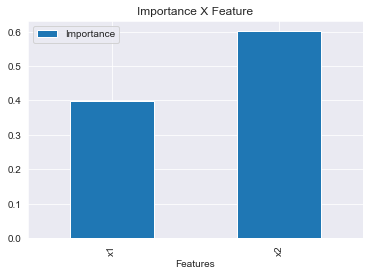

In [17]:
feature_importance.plot.bar(x='Features').set_title('Importance X Feature');